# Credit Evaluation Notebook

Import All required modules

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

Load tarining data and read file

In [2]:
crdit_raw = pd.read_csv('training.csv')

In [3]:
crdit_raw.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,496819.831400,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211
std,287391.314157,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243
min,244.000000,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052
25%,245172.500000,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424
50%,495734.000000,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841
75%,745475.250000,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,1004.497869,30.131214,1.000000


In [4]:
 crdit_raw.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


Now that we have an overview, dealing with each each column data and null values

In [5]:
crdit_raw.isnull().any()

customer_id          False
demographic_slice    False
country_reg          False
ad_exp               False
est_income           False
hold_bal             False
pref_cust_prob       False
imp_cscore           False
RiskScore            False
imp_crediteval       False
axio_score           False
card_offer           False
dtype: bool

In [6]:
crdit_raw.columns[crdit_raw.isnull().any()]

Index([], dtype='object')

There are no missing values, so no need to compute aor deal with missing values

We need to remove outliers if any from each column. This will ensure the results are not skewed

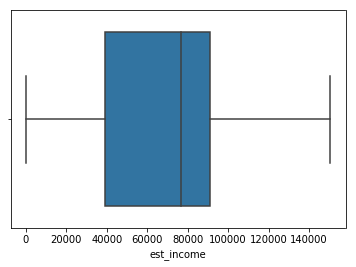

In [7]:
sns.boxplot(x=crdit_raw['est_income'])


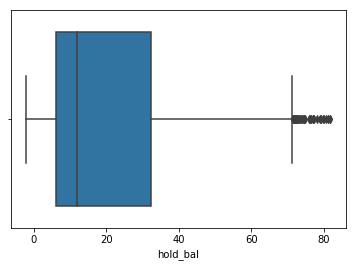

In [8]:
sns.boxplot(x=crdit_raw['hold_bal'])


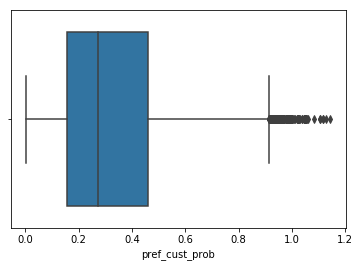

In [9]:
sns.boxplot(x=crdit_raw['pref_cust_prob'])


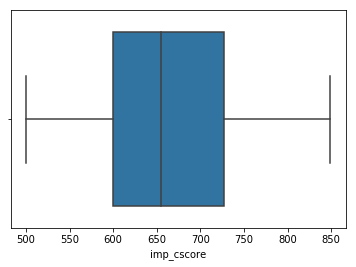

In [10]:
sns.boxplot(x=crdit_raw['imp_cscore'])


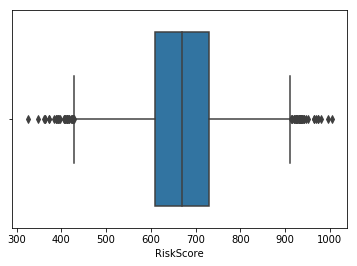

In [11]:
sns.boxplot(x=crdit_raw['RiskScore'])


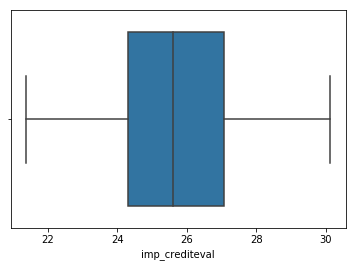

In [12]:
sns.boxplot(x=crdit_raw['imp_crediteval'])


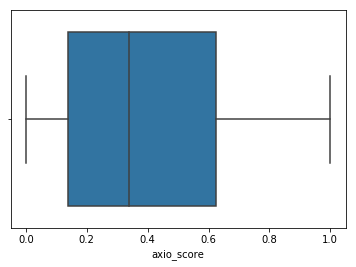

In [13]:
sns.boxplot(x=crdit_raw['axio_score'])

We see there are outliers for the columns RiskScore, imp_cscore and pref_cust_prob . So we will need to remove those from our training data

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

In [14]:
risk_score_Q1 = crdit_raw['RiskScore'].quantile(0.25)
risk_score_Q3 = crdit_raw['RiskScore'].quantile(0.75)
risk_score_IQR = risk_score_Q3 - risk_score_Q1
risk_score_min=risk_score_Q1 - (risk_score_IQR*1.5)
risk_score_max=risk_score_Q3 + (risk_score_IQR*1.5)
print("risk_score_IQR = "+str(risk_score_IQR))


imp_cscore_Q1 = crdit_raw['imp_cscore'].quantile(0.25)
imp_cscore_Q3 = crdit_raw['imp_cscore'].quantile(0.75)
imp_cscore_IQR = imp_cscore_Q3 - imp_cscore_Q1
imp_cscore_min=imp_cscore_Q1 - (imp_cscore_IQR*1.5)
imp_cscore_max=imp_cscore_Q3 + (imp_cscore_IQR*1.5)
print("imp_cscore_IQR = "+str(imp_cscore_IQR))


pref_cust_prob_Q1 = crdit_raw['pref_cust_prob'].quantile(0.25)
pref_cust_prob_Q3 = crdit_raw['pref_cust_prob'].quantile(0.75)
pref_cust_prob_IQR = pref_cust_prob_Q3 - pref_cust_prob_Q1
pref_cust_prob_min=pref_cust_prob_Q1 - (pref_cust_prob_IQR*1.5)
pref_cust_prob_max=pref_cust_prob_Q3 + (pref_cust_prob_IQR*1.5)
print("pref_cust_prob_IQR = "+str(pref_cust_prob_IQR))
print()
print ("risk_score_min ="+str(risk_score_min) +" ::::: "+"risk_score_max ="+str(risk_score_max))
print ("imp_cscore_min ="+str(imp_cscore_min) +" ::::: "+"imp_cscore_max ="+str(imp_cscore_max))
print ("pref_cust_prob_min ="+str(pref_cust_prob_min) +" ::::: "+"pref_cust_prob_max ="+str(pref_cust_prob_max))

risk_score_IQR = 121.25380374369252
imp_cscore_IQR = 127.0
pref_cust_prob_IQR = 0.30292516581097373

risk_score_min =427.35047536172647 ::::: risk_score_max =912.3656903364965
imp_cscore_min =409.5 ::::: imp_cscore_max =917.5
pref_cust_prob_min =-0.2974231051514481 ::::: pref_cust_prob_max =0.9142775580924468


### The above gives range of each IQR. Then we remove all th outliers from all the 3 columsn

In [15]:
credit_no_outliers = crdit_raw.loc[(crdit_raw['RiskScore'] > risk_score_min) & (crdit_raw['RiskScore'] < risk_score_max)]


In [16]:
credit_no_outliers.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,497043.859057,65870.077277,20.980726,0.329679,662.437236,669.834437,25.688243,0.393086
std,287413.244562,31106.451817,18.845011,0.223421,90.507851,87.192262,1.887875,0.288209
min,244.000000,2.054543,-2.140206,0.001781,500.000000,428.033014,21.363123,0.000092
25%,245155.500000,39148.645696,6.154399,0.157192,600.000000,609.626986,24.292013,0.139439
50%,496893.500000,76926.365168,11.968306,0.273050,655.000000,669.379043,25.610196,0.337421
75%,745531.500000,91082.947495,32.258555,0.459951,727.000000,729.979109,27.060501,0.624833
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,911.181969,30.131214,1.000000


In [17]:
credit_no_outliers = credit_no_outliers.loc[(credit_no_outliers['imp_cscore'] > imp_cscore_min) & (credit_no_outliers['imp_cscore'] < imp_cscore_max)]


In [18]:
credit_no_outliers.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,497043.859057,65870.077277,20.980726,0.329679,662.437236,669.834437,25.688243,0.393086
std,287413.244562,31106.451817,18.845011,0.223421,90.507851,87.192262,1.887875,0.288209
min,244.000000,2.054543,-2.140206,0.001781,500.000000,428.033014,21.363123,0.000092
25%,245155.500000,39148.645696,6.154399,0.157192,600.000000,609.626986,24.292013,0.139439
50%,496893.500000,76926.365168,11.968306,0.273050,655.000000,669.379043,25.610196,0.337421
75%,745531.500000,91082.947495,32.258555,0.459951,727.000000,729.979109,27.060501,0.624833
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,911.181969,30.131214,1.000000


In [19]:
credit_no_outliers = credit_no_outliers.loc[(crdit_raw['pref_cust_prob'] > pref_cust_prob_min) & (credit_no_outliers['pref_cust_prob'] < pref_cust_prob_max)]


In [20]:
credit_no_outliers.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000,9784.000000
mean,497751.719338,65885.609009,20.978336,0.320319,662.473835,669.869725,25.689637,0.393484
std,287420.840698,31106.356834,18.848666,0.210902,90.561729,87.116198,1.889197,0.288437
min,244.000000,2.054543,-2.140206,0.001781,500.000000,428.033014,21.363123,0.000092
25%,245930.250000,39181.333217,6.150577,0.155504,600.000000,609.627786,24.294207,0.139600
50%,497614.000000,76955.172160,11.922362,0.268817,655.000000,669.493442,25.611903,0.337841
75%,745984.500000,91137.966126,32.287644,0.449736,727.000000,729.993009,27.064328,0.625474
max,999870.000000,150538.809704,81.759632,0.914256,849.000000,911.181969,30.131214,1.000000


### Removed roughly 280 outliers from the dataset

In [21]:
credit_no_outliers.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


Now we have 3 columns with string  values., demographic_slice, country_reg, ad_exp.
We will drop columns which are irrelevant or convert them into numerical discrete values.

Checking for dsitinct demographic_slice

In [22]:
credit_no_outliers.demographic_slice.unique()

array(['AX03efs', 'BWEsk45', 'CARDIF2', 'DERS3w5'], dtype=object)

In [23]:
credit_no_outliers.country_reg.unique()

array(['W', 'E'], dtype=object)

In [24]:
credit_no_outliers.ad_exp.unique()
credit_no_outliers['ad_exp'] = credit_no_outliers['ad_exp'].map({'Y': 1, 'N': 0})
credit_no_outliers.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,0,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,0,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,1,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,1,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,0,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


In [25]:
credit_sklearn = credit_no_outliers.copy()
lb_make = LabelEncoder()
credit_sklearn['demographic_slice_encoded'] = lb_make.fit_transform(credit_no_outliers['demographic_slice'])
credit_sklearn['country_reg_encoded'] = lb_make.fit_transform(credit_no_outliers['country_reg'])
credit_sklearn=credit_sklearn.drop(['demographic_slice', 'country_reg'], axis=1)
credit_sklearn.head()

,customer_id,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer,demographic_slice_encoded,country_reg_encoded
0,713782,0,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False,0,1
1,515901,0,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False,0,0
2,95166,1,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False,0,1
3,425557,1,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False,0,0
4,624581,0,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False,0,1


### Dropped the string column after encoding them to numerical values.

### Data preprocessing complete. Now we split the data into training and testing data and run various classifer algorithm to get the best model

In [26]:
X=credit_sklearn.drop(['card_offer'],axis=1)
y=credit_sklearn['card_offer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 82.0378%
Log Loss: 2.775744407843222
SVC
****Results****
Accuracy: 86.0948%
Log Loss: 0.4033340696906456
DecisionTreeClassifier
****Results****
Accuracy: 96.5934%
Log Loss: 1.176607433707085
RandomForestClassifier
****Results****
Accuracy: 97.0889%
Log Loss: 0.11013802545089481
AdaBoostClassifier
****Results****
Accuracy: 98.4825%
Log Loss: 0.5510582747398198
GradientBoostingClassifier
****Results****
Accuracy: 98.1418%
Log Loss: 0.055039685247836506
GaussianNB
****Results****
Accuracy: 86.0948%
Log Loss: 0.36517707423865137
LinearDiscriminantAnalysis
****Results****
Accuracy: 95.2307%
Log Loss: 0.11363859589961241
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 96.1288%
Log Loss: 0.08619483375426466


## We have a winner here with AdaBoost having the highest accuracy and lowest Loss. So we will use that model to predict the future details. 
## Before doing that we need to apply each and every transformation on our predication data

In [28]:
pred = pd.read_csv('test.csv')

In [29]:
pred.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,596723,AX03efs,W,N,26323.092380,3.000000,0.461364,603,505.509062,23.806688,0.351222,NaN
1,841834,AX03efs,E,Y,67374.621650,17.861095,0.473517,650,466.158076,26.068803,0.080106,NaN
2,402401,AX03efs,E,N,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,NaN
3,734431,AX03efs,E,Y,15814.210260,22.058403,0.462249,530,747.158221,22.533957,0.080122,NaN
4,739547,AX03efs,W,Y,45233.588190,1.000000,0.541660,640,704.781194,24.298782,0.667270,NaN


In [30]:
pred.isnull().any()

customer_id          False
demographic_slice    False
country_reg          False
ad_exp               False
est_income           False
hold_bal             False
pref_cust_prob       False
imp_cscore           False
RiskScore            False
imp_crediteval       False
axio_score           False
card_offer            True
dtype: bool

In [31]:
pred= pred.drop(['card_offer'],axis=1)

In [32]:
pred.demographic_slice.unique()

array(['AX03efs', 'BWEsk45', 'CARDIF2', 'DERS3w5'], dtype=object)

In [33]:
pred.country_reg.unique()

array(['W', 'E'], dtype=object)

In [34]:
pred.ad_exp.unique()

array(['N', 'Y'], dtype=object)

In [35]:
pred['ad_exp'] = pred['ad_exp'].map({'Y': 1, 'N': 0})
pred.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
0,596723,AX03efs,W,0,26323.092380,3.000000,0.461364,603,505.509062,23.806688,0.351222
1,841834,AX03efs,E,1,67374.621650,17.861095,0.473517,650,466.158076,26.068803,0.080106
2,402401,AX03efs,E,0,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180
3,734431,AX03efs,E,1,15814.210260,22.058403,0.462249,530,747.158221,22.533957,0.080122
4,739547,AX03efs,W,1,45233.588190,1.000000,0.541660,640,704.781194,24.298782,0.667270


In [36]:
pred_sklearn = pred.copy()
lb_make = LabelEncoder()
pred_sklearn['demographic_slice_encoded'] = lb_make.fit_transform(pred['demographic_slice'])
pred_sklearn['country_reg_encoded'] = lb_make.fit_transform(pred['country_reg'])
pred_sklearn=pred_sklearn.drop(['demographic_slice', 'country_reg'], axis=1)
pred_sklearn.head()


,customer_id,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,demographic_slice_encoded,country_reg_encoded
0,596723,0,26323.092380,3.000000,0.461364,603,505.509062,23.806688,0.351222,0,1
1,841834,1,67374.621650,17.861095,0.473517,650,466.158076,26.068803,0.080106,0,0
2,402401,0,1728.369713,21.604489,0.486220,606,603.346280,23.628955,0.208180,0,0
3,734431,1,15814.210260,22.058403,0.462249,530,747.158221,22.533957,0.080122,0,0
4,739547,1,45233.588190,1.000000,0.541660,640,704.781194,24.298782,0.667270,0,1


Now the above data is ready to be applied to our learning model

In [37]:
ada = AdaBoostClassifier();
model = ada.fit(X_train, y_train)

In [38]:
y_pred=model.predict(pred_sklearn)
y_pred

array([False, False, False, ...,  True,  True, False])

## Now that we have the prediction ready. Writing the prediction to a csv file named ds4.csv

In [39]:
def write_to_csv(predction):
    submission = pd.DataFrame()
    submission['Id'] = pred_sklearn.customer_id
    submission['Card_Offer']=predction
    submission.to_csv('ds4.csv', index=False)

In [40]:
write_to_csv(y_pred)

# End of NoteBook. Refer ds4.csv to find predictions along with customer id